# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [4]:
# student 1:Avraham Maro 2154
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [17]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [18]:
def load_and_show_csv(housing_train):
    """
    פונקציה לטעינת קובץ CSV והצגת 5 השורות הראשונות.
    
    פרמטרים:
    file_path: מחרוזת שמציינת את הנתיב לקובץ ה-CSV
    
    החזרה:
    None - מדפיסה את 5 השורות הראשונות של הקובץ
    """
    try:
        # טוען את הקובץ
        df = pd.read_csv(housing_train)
        
        # הצגת 5 השורות הראשונות
        print("First 5 value")
        print(df.head())
    
    except FileNotFoundError:
        print(f"Error: The file at {housing_train} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# שימוש בפונקציה

housing_train = r'C:\Users\אברהם מרו\Desktop\Hit\ML\מטלות\מטלה 2\housing_train.csv'  # הכנס כאן את הנתיב לקובץ שלך
housing_test = r'C:\Users\אברהם מרו\Desktop\Hit\ML\מטלות\מטלה 2\housing_test.csv'
load_and_show_csv(housing_train)
load_and_show_csv(housing_test)


First 5 value
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250  
First 5 value
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.0   5.249180   1.0098

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.863517     28.650678      5.412479      1.093546   1424.287609   
std        1.878577     12.623994      2.088680      0.378594   1139.012630   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.564375     18.000000      4.448665      1.005988    789.000000   
50%        3.536650     29.000000      5.225511      1.048780   1167.000000   
75%        4.744375     37.000000      6.046629      1.099691   1722.000000   
max       15.000100     52.000000     62.422222     15.312500  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16512.000000  16512.000000  16512.000000  16512.000000  
mean       3.101201     35.631452   -119.566283      2.065267  
std       11.587773      2.137537      2.006552      1.151219  
min        0.692308     32.54000

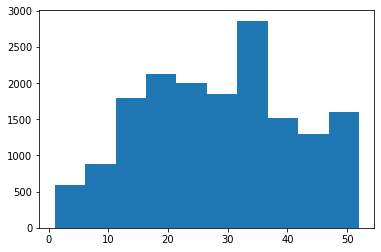

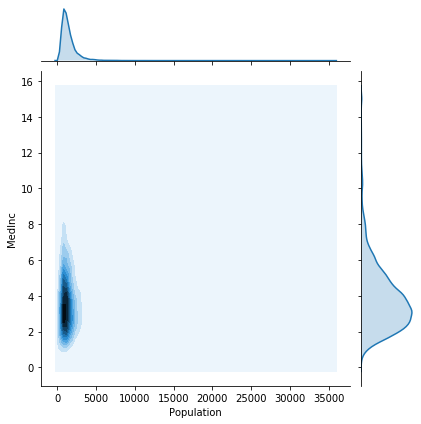

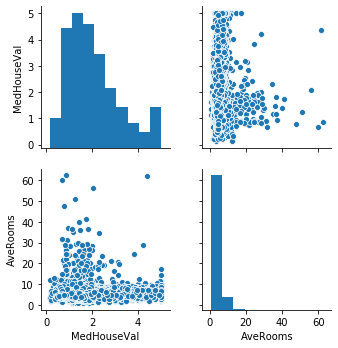

In [19]:
train = pd.read_csv(r'C:\Users\אברהם מרו\Desktop\Hit\ML\מטלות\מטלה 2\housing_train.csv')
test = pd.read_csv(r'C:\Users\אברהם מרו\Desktop\Hit\ML\מטלות\מטלה 2\housing_test.csv')

# 1. הצגת סטטיסטיקות כלליות
print(train.describe())

plt.hist(train['HouseAge'])
#print()
sns.jointplot(train['Population'], train['MedInc'], kind="kde")

sns.pairplot(train[['MedHouseVal','AveRooms']])

## Part 3 - Experiments
You could add as many code cells as needed

In [20]:
#housing_train = r'C:\Users\אברהם מרו\Desktop\Hit\ML\מטלות\מטלה 2\housing_train.csv'
# בדיקת ערכים חסרים
print(train.isnull().sum())

# אם יש ערכים חסרים, ניתן למלא אותם באופנים שונים, למשל, לפי הממוצע
train.fillna(train.mean(), inplace=True)




MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [28]:
# פונקציה לפיצ'ר אנג'ינירינג
def feature_engineering(X):
    scaler = StandardScaler()
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    X_scaled = scaler.fit_transform(X[numeric_cols])
    
    X[numeric_cols] = X_scaled
    return X

# פונקציה לביצוע 5-fold cross-validation ולמציאת ההייפרפרמטרים המוצלחים ביותר
def cross_validate_and_select_best_model(models_params, X, y):
    best_model = None
    best_r2 = -np.inf
    best_model_name = None
    best_params = None
    results = []

    # 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # עבור כל מודל המוגדר ב- models_params
    for model_name, model, param_grid in models_params:
        param_combinations = list(ParameterGrid(param_grid))

        for params in param_combinations:
            fold_results = []
            #print(f"\nבודק מודל: {model_name}, פרמטרים: {params}")

            for fold, (train_index, valid_index) in enumerate(kf.split(X), 1):
                X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
                y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
                
                # ביצוע פיצ'ר אנג'ינירינג
                X_train_fe = feature_engineering(X_train.copy())
                X_valid_fe = feature_engineering(X_valid.copy())

                # הגדרת המודל עם הפרמטרים הנוכחיים
                model.set_params(**params)

                # אימון המודל
                model.fit(X_train_fe, y_train)
                y_valid_pred = model.predict(X_valid_fe)

                # חישוב r^2 לכל fold
                r2 = r2_score(y_valid, y_valid_pred)
                fold_results.append(r2)
                #print(f"Fold {fold}: R^2 = {r2:.4f}")

            # ממוצע ה-R^2 על פני כל ה-folds עבור הייפרפרמטרים הנוכחיים
            avg_r2 = np.mean(fold_results)
            results.append({
                'model': model_name,
                'params': params,
                'average_r2': avg_r2
            })

            # בדיקה אם זהו הביצוע הטוב ביותר עד כה
            if avg_r2 > best_r2:
                best_r2 = avg_r2
                best_model = model
                best_model_name = model_name
                best_params = params

    # הדפסת התוצאות עבור כל שילוב פרמטרים
    print("\nתוצאות עבור כל שילוב פרמטרים:")
    for res in results:
        print(f"model: {res['model']}, param: {res['params']}, Average R^2: {res['average_r2']:.4f}")
    
    return best_model_name, best_model, best_params, best_r2

# הגדרת נתונים
X = train.drop(columns='MedHouseVal')  # הנחה ש-MedHouseVal הוא היעד
y = train['MedHouseVal']


# הגדרת מודלים ומרווחים של הייפרפרמטרים לבדיקת שילובים שונים
models_params = [
    ('RandomForestRegressor', RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 200],
        'max_depth': [20, None],
        'min_samples_split': [5, 10]
    }),
    ('LinearRegression', LinearRegression(), {
        'fit_intercept': [True, False],
        'normalize': [True, False]
    })
]

# קריאה לפונקציה למציאת השילוב המיטבי
best_model_name, best_model, best_params, best_r2 = cross_validate_and_select_best_model(models_params, X, y)

# הדפסת התוצאות הטובות ביותר
print(f"\nBest Model: {best_model_name}")
print(f"Best hyper parameters: {best_params}")
print(f"Highest R^2 avergae: {best_r2:.4f}")


תוצאות עבור כל שילוב פרמטרים:
model: RandomForestRegressor, param: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}, Average R^2: 0.6548
model: RandomForestRegressor, param: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}, Average R^2: 0.6630
model: RandomForestRegressor, param: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}, Average R^2: 0.6536
model: RandomForestRegressor, param: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}, Average R^2: 0.6614
model: RandomForestRegressor, param: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}, Average R^2: 0.6540
model: RandomForestRegressor, param: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}, Average R^2: 0.6630
model: RandomForestRegressor, param: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}, Average R^2: 0.6525
model: RandomForestRegressor, param: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}, Average R^2: 

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [26]:
# לאמן מחדש את המודל על כל ה-Train data עם ההייפרפרמטרים המיטביים
def retrain_best_model_on_full_data(best_model, best_params, X, y):
    # ביצוע פיצ'ר אנג'ינירינג
    X_fe = feature_engineering(X.copy())

    # הגדרת המודל עם ההייפרפרמטרים המיטביים
    best_model.set_params(**best_params)

    # אימון המודל על כל ה-Train data
    best_model.fit(X_fe, y)
    print("\nהמודל אומן מחדש על כל ה-Train data עם ההייפרפרמטרים המיטביים.")

# קריאה לפונקציה לאימון מחדש על כל ה-Train data
retrain_best_model_on_full_data(best_model, best_params, X, y)


המודל אומן מחדש על כל ה-Train data עם ההייפרפרמטרים המיטביים.


## Part 5 - Apply on test and show model performance estimation

In [27]:
X_test = train.drop(columns='MedHouseVal')  # הנחה ש-MedHouseVal הוא היעד
y_test = train['MedHouseVal']

# פונקציה להפעלת המודל על ה-Test data והדפסת התוצאות
def predict_and_evaluate_on_test(best_model, X_test, y_test):
    # ביצוע פיצ'ר אנג'ינירינג על ה-Test data
    X_test_fe = feature_engineering(X_test.copy())

    # חיזוי הערכים עבור ה-Test data
    y_test_pred = best_model.predict(X_test_fe)

    # חישוב איכות המודל לפי R^2
    r2 = r2_score(y_test, y_test_pred)
    print(f"\nאיכות המודל על ה-Test לפי R^2: {r2:.4f}")

    # הצגת 5 התוצאות הראשונות בהשוואה לערכים האמיתיים
    results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred})
    print("\nהשוואת 5 התחזיות הראשונות לערכים האמיתיים:")
    print(results.head())

# שימוש בקומבינציה הטובה ביותר לאימון מחדש על כל ה-Train data
retrain_best_model_on_full_data(best_model, best_params, X, y)

# יישום המודל על ה-Test data והערכתו
predict_and_evaluate_on_test(best_model, X_test, y_test)


המודל אומן מחדש על כל ה-Train data עם ההייפרפרמטרים המיטביים.

איכות המודל על ה-Test לפי R^2: 0.9630

השוואת 5 התחזיות הראשונות לערכים האמיתיים:
   Actual  Predicted
0   3.500   3.801082
1   0.883   1.030948
2   2.536   2.366550
3   1.810   1.947605
4   1.250   1.271629
